In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
import datetime as dt

In [2]:
uber = pd.read_csv("C:/Vikas/DS-UPGRAD-IIITB-2018-2019/Python/Uber_Assignment/Uber Request Data.csv")

In [3]:
uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [5]:
uber.shape

(6745, 6)

# Data Cleaning, Analysis and Deriving New Columns as required post Data Analysis

In [6]:
uber.isnull().sum() #Checking for NaN values in the dataframe columns

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
#Summation for the NULL values in each row using axis =1 
uber.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6715    2
6716    2
6717    2
6718    2
6719    2
6720    2
6721    2
6722    2
6723    2
6724    2
6725    2
6726    2
6727    2
6728    2
6729    2
6730    2
6731    2
6732    2
6733    2
6734    2
6735    2
6736    2
6737    2
6738    2
6739    2
6740    2
6741    2
6742    2
6743    2
6744    2
Length: 6745, dtype: int64

In [8]:
# % of values as NaN
round(100 * (uber.isnull().sum()/len(uber.index)),2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [9]:
pd.Series(uber['Request id']).nunique() #to check if all Request IDs given are unique 

6745

# Convert the columns Request timestamp and Drop timestamp to datetime format

In [10]:
# convert Request timestamp to date-time object
uber['Request timestamp'] = uber['Request timestamp'].astype(str)
uber['Request timestamp'] = uber['Request timestamp'].str.replace('/','-')
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], dayfirst = True)

In [11]:
uber['Drop timestamp'] = uber['Drop timestamp'].astype(str)
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace('/','-')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], dayfirst = True)

Extracting timestamp from "Request timestamp" and "Drop timestamp" and creating columns Request_Time and Drop_Time. These new columns with help to get Trip Time for each Trip. <br>
Extracting hour of the day from "Request timestamp" and creating column Request_Hr to define the Day slots(Morning, Afternoon, Evening, Night)<br>
Extracting Weekday Name from "Request Timestamp" Column

In [12]:
uber['Request_Time'] = uber['Request timestamp'].dt.time #Extracting time
uber['Drop_Time'] = uber['Drop timestamp'].dt.time #Extracting time
uber['Request_Hr'] = uber['Request timestamp'].dt.hour #Extracting hour
uber['Drop_Hr'] = uber['Drop timestamp'].dt.hour #Extracting hour
uber['WeekDay'] = uber['Request timestamp'].dt.day_name() #Extracting Day Name

In [13]:
#Finding time taken to complete the Trip.
uber['Trip Time'] = uber['Drop timestamp'] - uber['Request timestamp']

In [14]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 12 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request_Time         6745 non-null object
Drop_Time            2831 non-null object
Request_Hr           6745 non-null int64
Drop_Hr              2831 non-null float64
WeekDay              6745 non-null object
Trip Time            2831 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(5), timedelta64[ns](1)
memory usage: 632.4+ KB


In [15]:
uber.isnull().sum() #Checking after converting to timestamp to verify

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request_Time            0
Drop_Time            3914
Request_Hr              0
Drop_Hr              3914
WeekDay                 0
Trip Time            3914
dtype: int64

In [16]:
uber['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [17]:
uber['Status'].value_counts().sum() #Checking the value counts for each Status

6745

In [18]:
uber['Pickup point'].value_counts() #Checking the value counts for each Pickup Point

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [19]:
uber['Trip Time'].max() #Maximum Trip Time

Timedelta('0 days 01:23:00')

In [20]:
uber['Trip Time'].min() #Minimum Trip Time

Timedelta('0 days 00:20:47')

In [21]:
uber=uber.sort_values(by=['Trip Time'], ascending=False) #Sorting the dataframe in Descending Order of Trip Time Values

In [22]:
#This Functions checks if "Request timestamp" is greater than "Drop timestamp" for Request IDs where Status is Trip Completed
#Which means that those rows are invalid.
def Invalid_entry(x):
    if (x['Status'] == 'Trip Completed'):
        if(x['Request timestamp'] > x['Drop timestamp']):
            return "YES" 
        else:
            return "NO"
    else:
       return "NA"

uber.loc[:, 'Invalid_entry'] = uber.apply(Invalid_entry, axis = 1)

# Creating Day Slots column with respect to Request Time as

If Request time is between 6:00AM to 11:59:59AM, then the Day Slot is "Morning" <br>
If Request time is between 12:00PM to 05:59:59PM, then the Day Slot is "Afternoon" <br>
If Request time is between 6:00PM to 11:59:59PM, then the Day Slot is "Evening" <br>
If Request time is between 12:00AM to 05:59:59AM, then the Day Slot is "Night" <br>

Below Function is created using Lambda and Apply

In [23]:
# creating Slots in a Day
def Slots(t):
    'divide day time into 4 categories'
    if 6 <= t < 12:
        return "Morning"
    elif 12 <= t < 18:
        return "Afternoon"
    elif 18 <= t < 24:
        return "Evening"
    else:
        return "Night"
    
uber["Day_Slot"] = uber.Request_Hr.apply(lambda t: Slots(t))

In [24]:
uber

Request id Pickup point  Driver id             Status  \
746         2417         City       77.0     Trip Completed   
535         4049         City       55.0     Trip Completed   
2104        5976      Airport      221.0     Trip Completed   
1214        3656         City      126.0     Trip Completed   
2592        6042      Airport      273.0     Trip Completed   
1093        5086      Airport      113.0     Trip Completed   
1761        3291         City      185.0     Trip Completed   
968          510         City      100.0     Trip Completed   
2286        2169      Airport      239.0     Trip Completed   
2586        2553      Airport      273.0     Trip Completed   
2757        6623         City      291.0     Trip Completed   
1856        4865      Airport      195.0     Trip Completed   
1569        4336         City      166.0     Trip Completed   
340         1274         City       35.0     Trip Completed   
568         4119         City       59.0     Trip Completed   
416         3954      Airport       43.0     Trip Completed   
1537        4736         City      162.0     Trip Completed   
2288        3613      Airport      239.0     Trip Completed   
152         6147         City       16.0     Trip Completed   
2643         375      Airport      279.0     Trip Completed   
1550         602         City      164.0     Trip Completed   
2611        2824         City      275.0     Trip Completed   
895         4748         City       91.0     Trip Completed   
1204        5868         City      125.0     Trip Completed   
826         5525      Airport       84.0     Trip Completed   
2650        3915         City      279.0     Trip Completed   
198         6543         City       21.0     Trip Completed   
1502        3985      Airport      159.0     Trip Completed   
1241        6676      Airport      128.0     Trip Completed   
2075        2707      Airport      219.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp Request_Time Drop_Time  \
746  2016-07-12 19:59:00 201

# Univariate Analysis

Find Count and Create plots to visualise the frequency of requests that get cancelled or show 'no cars available', so in this case we are grouping the dataframe uber with Status of Request other than Status as "Trip Completed"

In [25]:
uber[uber['Status']!='Trip Completed'].Status.value_counts()

No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

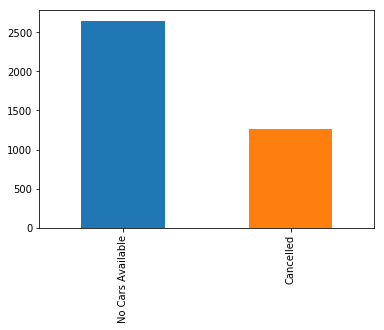

In [26]:
uber[uber['Status']!='Trip Completed'].Status.value_counts().plot(kind ='bar')

In [27]:
Request_by_Day_Slot = uber.groupby(['Day_Slot'])['Request id'].agg(['count'])
Request_by_Day_Slot

count
Day_Slot        
Afternoon   1228
Evening     2422
Morning     2072
Night       1023

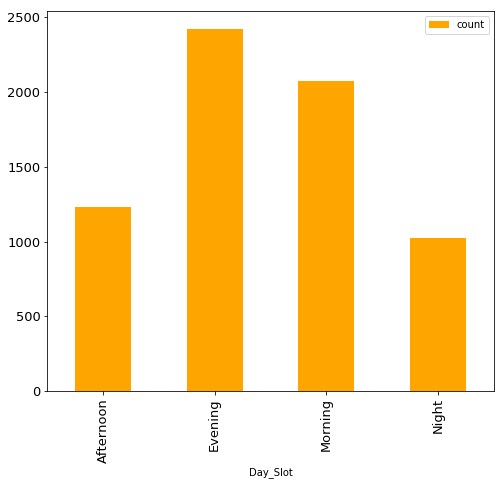

In [28]:
Request_by_Day_Slot.plot(kind='bar',figsize = (8,7), color = "orange", fontsize = 13, sort_columns = True)

# Bivariate Analysis

Find Count and identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots, so in this case we are grouping the dataframe uber with Status of Request and Pickup Point

In [29]:
df_uber = uber.groupby(['Pickup point','Status'])['Request id'].agg(['count'])
#df_uber.plot(kind = 'bar', figsize = (10,7), color = "coral", fontsize = 13)
df_uber

count
Pickup point Status                  
Airport      Cancelled            198
             No Cars Available   1713
             Trip Completed      1327
City         Cancelled           1066
             No Cars Available    937
             Trip Completed      1504

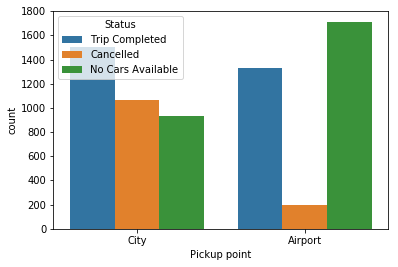

In [30]:
# plot Pickup Point using status and identify one of the most critical problems
sns.countplot(x = "Pickup point", hue = "Status",data = uber)

In [31]:
df_uber.sum()

count    6745
dtype: int64

In [32]:
df_uber_gap_analysis = uber.groupby(['Day_Slot','Status'])['Request id'].agg(['count'])
df_uber_gap_analysis

count
Day_Slot  Status                  
Afternoon Cancelled            126
          No Cars Available    460
          Trip Completed       642
Evening   Cancelled            153
          No Cars Available   1379
          Trip Completed       890
Morning   Cancelled            744
          No Cars Available    428
          Trip Completed       900
Night     Cancelled            241
          No Cars Available    383
          Trip Completed       399

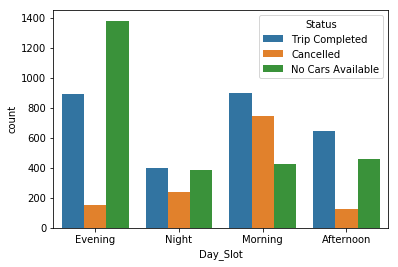

In [33]:
# plot Day slot using status and identify one of the most critical problems
sns.countplot(x = "Day_Slot", hue = "Status",data = uber)

# Multivariate Analysis

In this we still go deeper and groupby uber dataframe with Day_Slots(Morning,Afternoon, Evening, Night), Status of Request and Pickup Point to identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) with respect to Status of the Request using plot

In [34]:
df_uber_by_Pickup_Point_Slot = uber.groupby(['Day_Slot','Pickup point','Status'])['Request id'].agg(['count'])
df_uber_by_Pickup_Point_Slot

count
Day_Slot  Pickup point Status                  
Afternoon Airport      Cancelled             69
                       No Cars Available    279
                       Trip Completed       299
          City         Cancelled             57
                       No Cars Available    181
                       Trip Completed       343
Evening   Airport      Cancelled             90
                       No Cars Available   1242
                       Trip Completed       441
          City         Cancelled             63
                       No Cars Available    137
                       Trip Completed       449
Morning   Airport      Cancelled             33
                       No Cars Available     41
                       Trip Completed       399
          City         Cancelled            711
                       No Cars Available    387
                       Trip Completed       501
Night     Airport      Cancelled              6
                       No Cars Available    151
                       Trip Completed       188
          City         Cancelled            235
                       No Cars Available    232
                       Trip Completed       211

In [35]:
df_uber_by_Pickup_Point_Slot.sum()

count    6745
dtype: int64

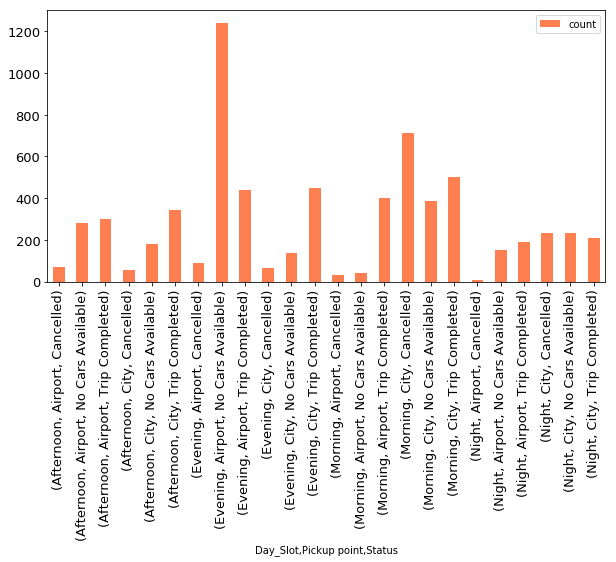

In [36]:
df_uber_by_Pickup_Point_Slot.plot(kind = 'bar',color = "coral",figsize = (10,5), fontsize = 13)

# Demand Supply Gap Analysis

Demand-Supply GAP Analysis: Finding values of Demand Supply Gap Analysis with two points:
1) Demand Supply Gap Analysis with respect to Day Slot we have defined above.
2) Demand Supply Gap Analysis with respect to Day Slot we have defined above and the Pickup Points(Airport to City Or City to Airport)

Aim: To Get the Supply Demand issues during the Day Slots and also from which pick point (Airport to City Or City to Airport) at which Day_Slot the Demand and Supply varies high.

In [37]:
#From the original dataframe uber trying to Understand what is Demand and Supply Gap

#Demand is all the request made and Supply is number of Trips Completed

#Extracting frequency counts of Status as "Trip Cancelled(x_tc)", "No Cars Available(x_nca)", "Cancelled (x_can)"
x_tc = len(uber[uber['Status']=='Trip Completed'])
x_nca = len(uber[uber['Status']=='No Cars Available'])
x_can = len(uber[uber['Status']=='Cancelled'])

Demand = x_tc + x_nca + x_can 
Supply = x_tc

print("Demand:",Demand)
print("Supply:",Supply)

Gap = Demand - Supply
print('Gap:', Gap)

Demand: 6745
Supply: 2831
Gap: 3914


# Creating Dataframe depending on Day Slots from original dataframe uber

# Morning Slot
Creating Dataframe for Morning Slot and performing Demand Supply Analysis by Day Slot and Pickup Point

In [38]:
uber_time_slot_morning = uber[(uber['Day_Slot'].str.contains('Morning'))]

can_m = len(uber_time_slot_morning[uber_time_slot_morning['Status']=='Cancelled'])
nca_m = len(uber_time_slot_morning[uber_time_slot_morning['Status']=='No Cars Available'])
tc_m = len(uber_time_slot_morning[uber_time_slot_morning['Status']=='Trip Completed'])

Demand_morning = can_m + nca_m + tc_m #Demand at Morning
Supply_morning = tc_m #Supply at Morning
Gap_morning = Demand_morning - Supply_morning #Gap at Morning

print("Demand at Morning:",Demand_morning)
print("Supply at Morning:",Supply_morning)
print("Gap at Morning:",Gap_morning)

## Airport to City Calculations ##

can_m_a_to_c = len(uber_time_slot_morning.loc[(uber_time_slot_morning['Status'] == 'Cancelled') 
                                              & (uber_time_slot_morning['Pickup point'] == "Airport")])
nca_m_a_to_c = len(uber_time_slot_morning.loc[(uber_time_slot_morning['Status'] == 'No Cars Available') 
                                              & (uber_time_slot_morning['Pickup point'] == "Airport")])
tc_m_a_to_c = len(uber_time_slot_morning.loc[(uber_time_slot_morning['Status'] == 'Trip Completed') 
                                              & (uber_time_slot_morning['Pickup point'] == "Airport")])

Demand_morning_a_to_c = can_m_a_to_c + nca_m_a_to_c + tc_m_a_to_c #Demand at Morning from Airport to City
Supply_morning_a_to_c = tc_m_a_to_c #Supply at Morning from Airport to City
Gap_morning_a_to_c = Demand_morning_a_to_c - Supply_morning_a_to_c #Gap at Morning from Airport to City

print("Demand at Morning(Airport to City):",Demand_morning_a_to_c)
print("Supply at Morning(Airport to City):",Supply_morning_a_to_c)
print("Gap at Morning(Airport to City):",Gap_morning_a_to_c)

## City to Airport Calculations ##

can_m_c_to_a = len(uber_time_slot_morning.loc[(uber_time_slot_morning['Status'] == 'Cancelled') 
                                              & (uber_time_slot_morning['Pickup point'] == "City")])
nca_m_c_to_a = len(uber_time_slot_morning.loc[(uber_time_slot_morning['Status'] == 'No Cars Available') 
                                              & (uber_time_slot_morning['Pickup point'] == "City")])
tc_m_c_to_a = len(uber_time_slot_morning.loc[(uber_time_slot_morning['Status'] == 'Trip Completed') 
                                              & (uber_time_slot_morning['Pickup point'] == "City")])

Demand_morning_c_to_a = can_m_c_to_a + nca_m_c_to_a + tc_m_c_to_a #Demand at Morning from City to Airport 
Supply_morning_c_to_a = tc_m_c_to_a #Supply at Morning from City to Airport
Gap_morning_c_to_a = Demand_morning_c_to_a - Supply_morning_c_to_a #Gap at Morning from City to Airport

print("Demand at Morning(City to Airport):",Demand_morning_c_to_a)
print("Supply at Morning(City to Airport):",Supply_morning_c_to_a)
print("Gap at Morning(City to Airport):",Gap_morning_c_to_a)

Demand at Morning: 2072
Supply at Morning: 900
Gap at Morning: 1172
Demand at Morning(Airport to City): 473
Supply at Morning(Airport to City): 399
Gap at Morning(Airport to City): 74
Demand at Morning(City to Airport): 1599
Supply at Morning(City to Airport): 501
Gap at Morning(City to Airport): 1098


Pickup point  Status           
Airport       Cancelled             33
              No Cars Available     41
              Trip Completed       399
City          Cancelled            711
              No Cars Available    387
              Trip Completed       501
Name: Request id, dtype: int64


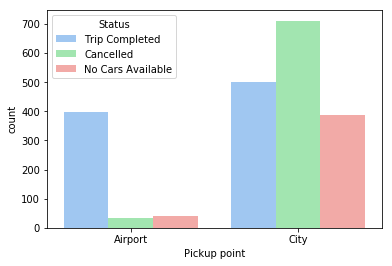

In [39]:
print(uber_time_slot_morning.groupby(['Pickup point','Status'])['Request id'].agg('count'))
sns.countplot(x="Pickup point", hue="Status", data = uber_time_slot_morning, palette="pastel")

# Afternoon Slot
Creating Dataframe for Afternoon Slot and performing Demand Supply Analysis by Day Slot and Pickup Point

In [40]:
uber_time_slot_afternoon = uber[(uber['Day_Slot'].str.contains('Afternoon'))]
can_af = len(uber_time_slot_afternoon[uber_time_slot_afternoon['Status']=='Cancelled'])
nca_af = len(uber_time_slot_afternoon[uber_time_slot_afternoon['Status']=='No Cars Available'])
tc_af = len(uber_time_slot_afternoon[uber_time_slot_afternoon['Status']=='Trip Completed'])

Demand_afternoon = can_af + nca_af + tc_af #Demand at Afternoon
Supply_afternoon = tc_af #Supply at Afternoon
Gap_afternoon = Demand_afternoon - Supply_afternoon #Gap at Afternoon

print("Demand at Afternoon:",Demand_afternoon)
print("Supply at Afternoon:",Supply_afternoon)
print("Gap at Afternoon:",Gap_afternoon)

can_af_a_to_c = len(uber_time_slot_afternoon.loc[(uber_time_slot_afternoon['Status'] == 'Cancelled') 
                                              & (uber_time_slot_afternoon['Pickup point'] == "Airport")])
nca_af_a_to_c = len(uber_time_slot_afternoon.loc[(uber_time_slot_afternoon['Status'] == 'No Cars Available') 
                                              & (uber_time_slot_afternoon['Pickup point'] == "Airport")])
tc_af_a_to_c = len(uber_time_slot_afternoon.loc[(uber_time_slot_afternoon['Status'] == 'Trip Completed') 
                                              & (uber_time_slot_afternoon['Pickup point'] == "Airport")])

## Airport to City Calculations ##

Demand_afternoon_a_to_c = can_af_a_to_c + nca_af_a_to_c + tc_af_a_to_c #Demand at Afternoon from Airport to City
Supply_afternoon_a_to_c = tc_af_a_to_c #Supply at Afternoon from Airport to City
Gap_afternoon_a_to_c = Demand_afternoon_a_to_c - Supply_afternoon_a_to_c #Gap at Afternoon from Airport to City

print("Demand at Afternoon(Airport to City):",Demand_afternoon_a_to_c)
print("Supply at Afternoon(Airport to City):",Supply_afternoon_a_to_c)
print("Gap at Afternoon(Airport to City):",Gap_afternoon_a_to_c)

## City to Airport Calculations ##

can_af_c_to_a = len(uber_time_slot_afternoon.loc[(uber_time_slot_afternoon['Status'] == 'Cancelled') 
                                              & (uber_time_slot_afternoon['Pickup point'] == "City")])
nca_af_c_to_a = len(uber_time_slot_afternoon.loc[(uber_time_slot_afternoon['Status'] == 'No Cars Available') 
                                              & (uber_time_slot_afternoon['Pickup point'] == "City")])
tc_af_c_to_a = len(uber_time_slot_afternoon.loc[(uber_time_slot_afternoon['Status'] == 'Trip Completed') 
                                              & (uber_time_slot_afternoon['Pickup point'] == "City")])


Demand_afternoon_c_to_a = can_af_c_to_a + nca_af_c_to_a + tc_af_c_to_a #Demand at Afternoon from City to Airport
Supply_afternoon_c_to_a = tc_af_c_to_a #Supply at Afternoon from City to Airport
Gap_afternoon_c_to_a = Demand_afternoon_c_to_a - Supply_afternoon_c_to_a #Gap at Afternoon from City to Airport

print("Demand at Afternoon(City to Airport):",Demand_afternoon_c_to_a)
print("Supply at Afternoon(City to Airport):",Supply_afternoon_c_to_a)
print("Gap at Afternoon(City to Airport):",Gap_afternoon_c_to_a)

Demand at Afternoon: 1228
Supply at Afternoon: 642
Gap at Afternoon: 586
Demand at Afternoon(Airport to City): 647
Supply at Afternoon(Airport to City): 299
Gap at Afternoon(Airport to City): 348
Demand at Afternoon(City to Airport): 581
Supply at Afternoon(City to Airport): 343
Gap at Afternoon(City to Airport): 238


Pickup point  Status           
Airport       Cancelled             69
              No Cars Available    279
              Trip Completed       299
City          Cancelled             57
              No Cars Available    181
              Trip Completed       343
Name: Request id, dtype: int64


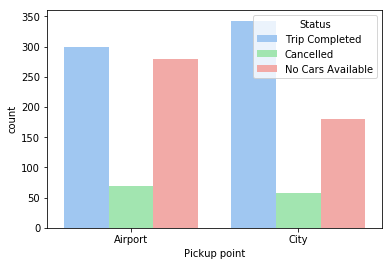

In [41]:
print(uber_time_slot_afternoon.groupby(['Pickup point','Status'])['Request id'].agg('count'))
sns.countplot(x="Pickup point", hue="Status", data = uber_time_slot_afternoon,palette="pastel")

# Evening Slot
Creating Dataframe for Evening Slot and performing Demand Supply Analysis by Day Slot and Pickup Point

In [42]:
uber_time_slot_evening = uber[(uber['Day_Slot'].str.contains('Evening'))]
can_ev = len(uber_time_slot_evening[uber_time_slot_evening['Status']=='Cancelled'])
nca_ev = len(uber_time_slot_evening[uber_time_slot_evening['Status']=='No Cars Available'])
tc_ev = len(uber_time_slot_evening[uber_time_slot_evening['Status']=='Trip Completed'])

Demand_evening = can_ev + nca_ev + tc_ev #Demand at Evening
Supply_evening = tc_ev #Supply at Evening
Gap_evening = Demand_evening - Supply_evening #Gap at Evening

print("Demand at Evening:",Demand_evening)
print("Supply at Evening:",Supply_evening)
print("Gap at Evening:",Gap_evening)

## Airport to City Calculations ##

can_ev_a_to_c = len(uber_time_slot_evening.loc[(uber_time_slot_evening['Status'] == 'Cancelled') 
                                              & (uber_time_slot_evening['Pickup point'] == "Airport")])
nca_ev_a_to_c = len(uber_time_slot_evening.loc[(uber_time_slot_evening['Status'] == 'No Cars Available') 
                                              & (uber_time_slot_evening['Pickup point'] == "Airport")])
tc_ev_a_to_c = len(uber_time_slot_evening.loc[(uber_time_slot_evening['Status'] == 'Trip Completed') 
                                              & (uber_time_slot_evening['Pickup point'] == "Airport")])

Demand_evening_a_to_c = can_ev_a_to_c + nca_ev_a_to_c + tc_ev_a_to_c #Demand at Evening from Airport to City
Supply_evening_a_to_c = tc_ev_a_to_c #Supply at Evening from Airport to City
Gap_evening_a_to_c = Demand_evening_a_to_c - Supply_evening_a_to_c #Gap at Evening from Airport to City

print("Demand at Evening(Airport to City):",Demand_evening_a_to_c)
print("Supply at Evening(Airport to City):",Supply_evening_a_to_c)
print("Gap at Evening(Airport to City):",Gap_evening_a_to_c)

## City to Airport Calculations ##

can_ev_c_to_a = len(uber_time_slot_evening.loc[(uber_time_slot_evening['Status'] == 'Cancelled') 
                                              & (uber_time_slot_evening['Pickup point'] == "City")])
nca_ev_c_to_a = len(uber_time_slot_evening.loc[(uber_time_slot_evening['Status'] == 'No Cars Available') 
                                              & (uber_time_slot_evening['Pickup point'] == "City")])
tc_ev_c_to_a = len(uber_time_slot_evening.loc[(uber_time_slot_evening['Status'] == 'Trip Completed') 
                                              & (uber_time_slot_evening['Pickup point'] == "City")])

Demand_evening_c_to_a = can_ev_c_to_a + nca_ev_c_to_a + tc_ev_c_to_a
Supply_evening_c_to_a = tc_ev_c_to_a
Gap_evening_c_to_a = Demand_evening_c_to_a - Supply_evening_c_to_a

print("Demand at Evening(City to Airport):",Demand_evening_c_to_a)
print("Supply at Evening(City to Airport):",Supply_evening_c_to_a)
print("Gap at Evening(City to Airport):",Gap_evening_c_to_a)

Demand at Evening: 2422
Supply at Evening: 890
Gap at Evening: 1532
Demand at Evening(Airport to City): 1773
Supply at Evening(Airport to City): 441
Gap at Evening(Airport to City): 1332
Demand at Evening(City to Airport): 649
Supply at Evening(City to Airport): 449
Gap at Evening(City to Airport): 200


Pickup point  Status           
Airport       Cancelled              90
              No Cars Available    1242
              Trip Completed        441
City          Cancelled              63
              No Cars Available     137
              Trip Completed        449
Name: Request id, dtype: int64


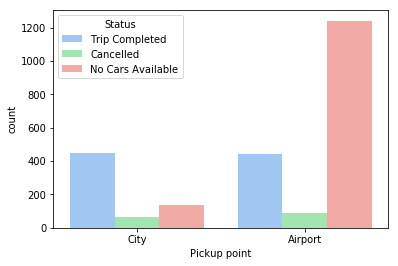

In [43]:
print(uber_time_slot_evening.groupby(['Pickup point','Status'])['Request id'].agg('count'))
sns.countplot(x="Pickup point", hue="Status", data = uber_time_slot_evening,palette="pastel")

# Night Slot
Creating Dataframe for Night Slot and performing Demand Supply Analysis by Day Slot and Pickup Point

In [44]:
uber_time_slot_night = uber[(uber['Day_Slot'].str.contains('Night'))]
can_nt = len(uber_time_slot_night[uber_time_slot_night['Status']=='Cancelled'])
nca_nt = len(uber_time_slot_night[uber_time_slot_night['Status']=='No Cars Available'])
tc_nt = len(uber_time_slot_night[uber_time_slot_night['Status']=='Trip Completed'])

Demand_night = can_nt + nca_nt + tc_nt #Demand at Night
Supply_night = tc_nt #Supply at Night
Gap_night = Demand_night - Supply_night #Gap at Night

print("Demand at night:",Demand_night)
print("Supply at night:",Supply_night)
print("Gap at night:",Gap_night)

## Airport to City Calculations ##

can_nt_a_to_c = len(uber_time_slot_night.loc[(uber_time_slot_night['Status'] == 'Cancelled') 
                                              & (uber_time_slot_night['Pickup point'] == "Airport")])
nca_nt_a_to_c = len(uber_time_slot_night.loc[(uber_time_slot_night['Status'] == 'No Cars Available') 
                                              & (uber_time_slot_night['Pickup point'] == "Airport")])
tc_nt_a_to_c = len(uber_time_slot_night.loc[(uber_time_slot_night['Status'] == 'Trip Completed') 
                                              & (uber_time_slot_night['Pickup point'] == "Airport")])

Demand_night_a_to_c = can_nt_a_to_c + nca_nt_a_to_c + tc_nt_a_to_c #Demand at Night from Airport to City
Supply_night_a_to_c = tc_nt_a_to_c #Supply at Night from Airport to City
Gap_night_a_to_c = Demand_night_a_to_c - Supply_night_a_to_c #Gap at Night from Airport to City

print("Demand at Night(Airport to City):",Demand_night_a_to_c)
print("Supply at Night(Airport to City):",Supply_night_a_to_c)
print("Gap at Night(Airport to City):",Gap_night_a_to_c)

## City to Airport Calculations ##

can_nt_c_to_a = len(uber_time_slot_night.loc[(uber_time_slot_night['Status'] == 'Cancelled') 
                                              & (uber_time_slot_night['Pickup point'] == "City")])
nca_nt_c_to_a = len(uber_time_slot_night.loc[(uber_time_slot_night['Status'] == 'No Cars Available') 
                                              & (uber_time_slot_night['Pickup point'] == "City")])
tc_nt_c_to_a = len(uber_time_slot_night.loc[(uber_time_slot_night['Status'] == 'Trip Completed') 
                                              & (uber_time_slot_night['Pickup point'] == "City")])

Demand_night_c_to_a = can_nt_c_to_a + nca_nt_c_to_a + tc_nt_c_to_a #Demand at Night from City to Airport
Supply_night_c_to_a = tc_nt_c_to_a #Supply at Night from City to Airport
Gap_night_c_to_a = Demand_night_c_to_a - Supply_night_c_to_a #Gap at Night from City to Airport

print("Demand at Night(City to Airport):",Demand_night_c_to_a)
print("Supply at Night(City to Airport):",Supply_night_c_to_a)
print("Gap at Night(City to Airport):",Gap_night_c_to_a)

Demand at night: 1023
Supply at night: 399
Gap at night: 624
Demand at Night(Airport to City): 345
Supply at Night(Airport to City): 188
Gap at Night(Airport to City): 157
Demand at Night(City to Airport): 678
Supply at Night(City to Airport): 211
Gap at Night(City to Airport): 467


Pickup point  Status           
Airport       Cancelled              6
              No Cars Available    151
              Trip Completed       188
City          Cancelled            235
              No Cars Available    232
              Trip Completed       211
Name: Request id, dtype: int64


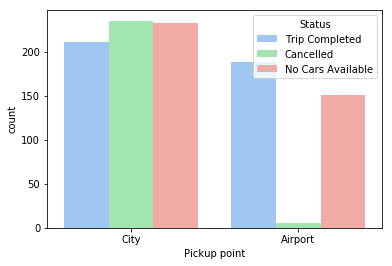

In [45]:
print(uber_time_slot_night.groupby(['Pickup point','Status'])['Request id'].agg('count'))
sns.countplot(x="Pickup point", hue="Status", data = uber_time_slot_night,palette="pastel")

# Creating Dataframe "Supply_Demand_Gap" with values Calculated for Demand, Supply, Gap with respect to Day Slot

This is created to analyze the Supply, Demand and Gap with respect to the Day Slots(Morning, Afternoon, Evening, Night)

In [46]:
SD = {'Type': ['Demand_Morning','Supply_Morning','Gap_Morning','Demand_Afternoon','Supply_Afternoon','Gap_Afternoon',
               'Demand_Evening','Supply_Evening','Gap_Evening','Demand_Night','Supply_Night','Gap_Night'], 
      'Counts': [Demand_morning,Supply_morning,Gap_morning,Demand_afternoon,Supply_afternoon,Gap_afternoon,
                 Demand_evening,Supply_evening,Gap_evening,Demand_night,Supply_night,Gap_night]}
Supply_Demand_Gap = pd.DataFrame(data=SD)

In [47]:
Supply_Demand_Gap

Type  Counts
0     Demand_Morning    2072
1     Supply_Morning     900
2        Gap_Morning    1172
3   Demand_Afternoon    1228
4   Supply_Afternoon     642
5      Gap_Afternoon     586
6     Demand_Evening    2422
7     Supply_Evening     890
8        Gap_Evening    1532
9       Demand_Night    1023
10      Supply_Night     399
11         Gap_Night     624

# Creating Dataframe "Supply_Demand_Gap_Pickup_Point" with values Calculated for Demand, Supply, Gap with respect to Day Slot and Pickup Point

This is created to analyze the Supply, Demand and Gap with respect to the Day Slots(Morning, Afternoon, Evening, Night) and Pickup Points(Airport to City, City to Airport)

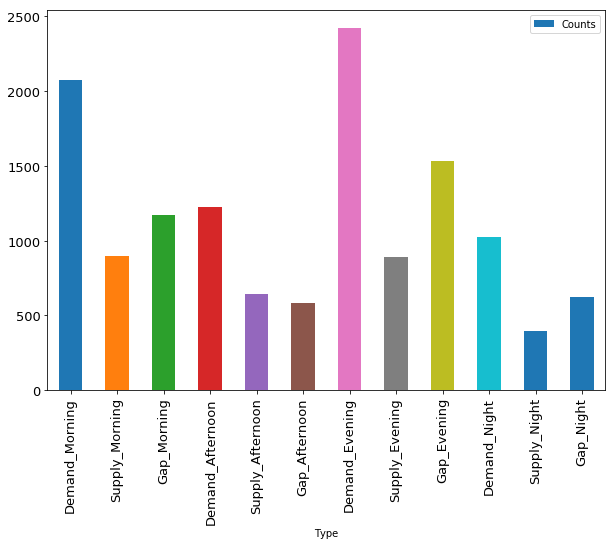

In [48]:
SD_graph = Supply_Demand_Gap.plot(kind = 'bar', x='Type', y = 'Counts', fontsize = 13,figsize = (10,7))

In [49]:
SD_Pickup_Point = {'Type': 
['Demand_Morning_Airport',
'Supply_Morning_Airport',
'Gap_Morning_Airport',
'Demand_Afternoon_Airport',
'Supply_Afternoon_Airport',
'Gap_Afternoon_Airport',
'Demand_Evening_Airport',
'Supply_Evening_Airport',
'Gap_Evening_Airport',
'Demand_Night_Airport',
'Supply_Night_Airport',
'Gap_Night_Airport',
'Demand_Morning_City',
'Supply_Morning_City',
'Gap_Morning_City',
'Demand_Afternoon_City',
'Supply_Afternoon_City',
'Gap_Afternoon_City',
'Demand_Evening_City',
'Supply_Evening_City',
'Gap_Evening_City',
'Demand_Night_City',
'Supply_Night_City',
'Gap_Night_City'], 
'Counts': 
[Demand_morning_a_to_c, 
Supply_morning_a_to_c, 
Gap_morning_a_to_c, 
Demand_afternoon_a_to_c,
Supply_afternoon_a_to_c, 
Gap_afternoon_a_to_c,
Demand_evening_a_to_c, 
Supply_evening_a_to_c, 
Gap_evening_a_to_c, 
Demand_night_a_to_c, 
Supply_night_a_to_c, 
Gap_night_a_to_c,
Demand_morning_c_to_a, 
Supply_morning_c_to_a, 
Gap_morning_c_to_a, 
Demand_afternoon_c_to_a, 
Supply_afternoon_c_to_a, 
Gap_afternoon_c_to_a,
Demand_evening_c_to_a, 
Supply_evening_c_to_a, 
Gap_evening_c_to_a, 
Demand_night_c_to_a, 
Supply_night_c_to_a, 
Gap_night_c_to_a]}

Supply_Demand_Gap_Pickup_Point = pd.DataFrame(data=SD_Pickup_Point)
Supply_Demand_Gap_Pickup_Point

Type  Counts
0     Demand_Morning_Airport     473
1     Supply_Morning_Airport     399
2        Gap_Morning_Airport      74
3   Demand_Afternoon_Airport     647
4   Supply_Afternoon_Airport     299
5      Gap_Afternoon_Airport     348
6     Demand_Evening_Airport    1773
7     Supply_Evening_Airport     441
8        Gap_Evening_Airport    1332
9       Demand_Night_Airport     345
10      Supply_Night_Airport     188
11         Gap_Night_Airport     157
12       Demand_Morning_City    1599
13       Supply_Morning_City     501
14          Gap_Morning_City    1098
15     Demand_Afternoon_City     581
16     Supply_Afternoon_City     343
17        Gap_Afternoon_City     238
18       Demand_Evening_City     649
19       Supply_Evening_City     449
20          Gap_Evening_City     200
21         Demand_Night_City     678
22         Supply_Night_City     211
23            Gap_Night_City     467

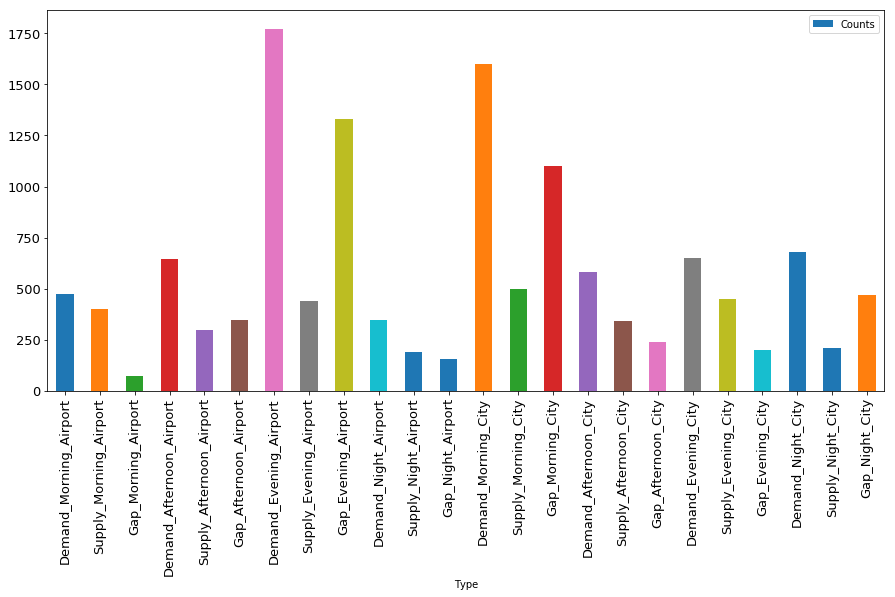

In [50]:
SD_Pickup_Point_graph = Supply_Demand_Gap_Pickup_Point.plot(kind = 'bar', x='Type', y = 'Counts', fontsize = 13,figsize = (15,7))

# Creating Pie Charts

Creating Pie Charts for the major problems seen above causing High Demand Supply Gap

In [51]:
# create pie charts to show percentages for Status for events whens Demand Supply Gap is HIGH
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

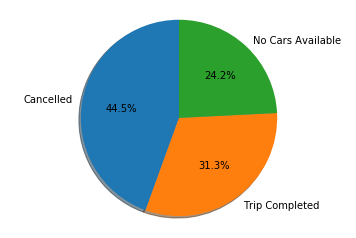

In [52]:
# Status of trips at Morning where pickup point is Airport
uber_df_city = uber_time_slot_morning.loc[(uber_time_slot_morning["Pickup point"] == "City")] 
uber_df_city_count = pd.DataFrame(uber_df_city.Status.value_counts())
pie_chart(uber_df_city_count)

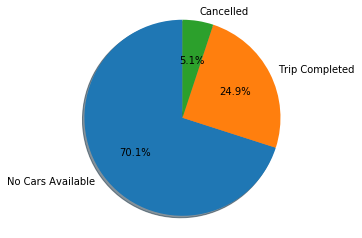

In [53]:
# Status of trips at Evening where pickup point is Airport
uber_df_airport = uber_time_slot_evening.loc[(uber_time_slot_evening["Pickup point"] == "Airport")] 
uber_df_airport_count = pd.DataFrame(uber_df_airport.Status.value_counts())
pie_chart(uber_df_airport_count)